In [1]:
# import the necessary libraries
import numpy as np
import pandas as pd

# import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [2]:
# Display all the columns in the dataset
pd.set_option('max_columns', None)

# Display at least 100 rows in the dataset
pd.set_option('max_rows', 100)

import re

In [3]:
# load the data
players_df = pd.read_csv('CompleteDataset.csv', index_col=0)
players_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (23,35) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€95.5M,€565K,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€105M,€565K,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.0,45.0,59.0,92.0,84.0,158023,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,€123M,€280K,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.0,46.0,59.0,88.0,79.0,190871,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€97M,€510K,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.0,58.0,65.0,88.0,80.0,176580,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€61M,€230K,1493,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,85,55,25,11,61,44,10,83,70,11,NaN,NaN,NaN,NaN,NaN,167495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# # Information on the data
# players_df.info()

In [5]:
# players_df['Preferred Positions'].unique()

### Questions
**1)** Who are the best players based on their positions? i.e ST, LW, RW, CAM, CM, CDM, LB, RB, LWB, RWB, CB, GK

**2)** Who are the top earners?

**3)** Which clubs pay the most?

**4)** Which players have the most value?

**5)** Which nation has the most valued players?

**6)** Which nationality is most represented in the data set?

**7)** Which nationality is least represented in the data set?

**8)** Which players have the most potential?

**9)** Which players are more versatile in terms of 'Preferred Positions'?

**10)** Best penalty, freekick takers?

**11)** Which players have the most aggression? Attackers or Midfielders??

**12)** Which players have the most stamina, ball control? Defenders or Midfielders??

**13)** Which players have the most positioning, jumping? Defenders or Attackers??

In [6]:
# A copy of the data
df = players_df.copy()

#### Data Wrangling
* The data contains a lot of rows and columns that need to be cleaned up.

In [7]:
def split_positions(position):
    """
    This returns a list that's stripped of white spaces.
    eg 'LW LS ' ==> 'LW,LS' 
    """
    value = ''
    lst = position.split()
    lgth = len(lst)
    
    for idx, val in enumerate(lst):
        if (idx + 1) != lgth:  # if it's not the last element
            value += f"{val},"
        else:
            value += f"{val}"
            
    return value

In [8]:
# Remove the whitespaces in 'Preferred Positions'
df['Preferred Positions'] = df['Preferred Positions'].apply(split_positions)

df.sample(3, random_state=6)[['Name', 'Preferred Positions']]

,Name,Preferred Positions
280,C. Vela,"ST,RW"
569,J. Stones,CB
8731,V. Vermeij,ST


### Qs1  Best players by position

In [9]:
def positions(position):
    """
    This function returns the position of a player. eg 'RM,CDM,CM' ==> 'Attacker',
    'RM,CM,RB' ==> 'Midfielder' 
    """
    lst = position.split(',')
    value = ''
    for val in lst:
        if val in ["ST", "CF", "LW", "RW", "LS", "RS", 'CAM']:
            value += "Attacker "
            
        elif val in ['CDM', 'CM', 'CAM', 'LM', 'RM']:
            value += "Midfielder "
         
        elif val in ['RB', 'LB', 'RWB', 'LWB', 'CB']:
            value += "Defender "
        
        else:
            value += "Goalkeeper"
    value = value.split()[0]
    
    return value.strip()

In [10]:
# Group the players into positions which could be:  "Attacker", "Midfielder", "Defender", or "Goalkeeper" 
df['Position'] = df['Preferred Positions'].apply(positions)

<br>

**Best Attackers:**

In [11]:
# Best Attackers
a = df.loc[df['Position'] == 'Attacker', 
       ['Name', 'Club', 'Overall', 'Value', 'Wage', 'Finishing', 'Dribbling','Ball control']][:10]
a[:5]

,Name,Club,Overall,Value,Wage,Finishing,Dribbling,Ball control
0,Cristiano Ronaldo,Real Madrid CF,94,€95.5M,€565K,94,91,93
1,L. Messi,FC Barcelona,93,€105M,€565K,95,97,95
2,Neymar,Paris Saint-Germain,92,€123M,€280K,89,96,95
3,L. Suárez,FC Barcelona,92,€97M,€510K,94,86,91
5,R. Lewandowski,FC Bayern Munich,91,€92M,€355K,91,85,89


<br>

**Best Midfielders:**

In [12]:
# Best Midfielders
df.loc[df['Position'] == 'Midfielder', 
       ['Name', 'Club', 'Overall', 'Value', 'Wage', 'Vision', 'Short passing', 'Agility', 'Standing tackle']][:5]

,Name,Club,Overall,Value,Wage,Vision,Short passing,Agility,Standing tackle
8,T. Kroos,Real Madrid CF,90,€79M,€340K,88,90,71,82
11,K. De Bruyne,Manchester City,89,€83M,€285K,90,90,80,51
13,A. Sánchez,Arsenal,89,€67.5M,€265K,83,81,90,39
14,L. Modrić,Real Madrid CF,89,€57M,€340K,90,92,93,80
22,Thiago,FC Bayern Munich,88,€70.5M,€225K,86,91,90,64


<br>

**Best Defenders:**

In [13]:
# Best Defenders
df.loc[df['Position'] == 'Defender', 
       ['Name', 'Club', 'Overall', 'Value', 'Wage', 'Marking', 'Standing tackle', 'Jumping',]][:5]

,Name,Club,Overall,Value,Wage,Marking,Standing tackle,Jumping
10,Sergio Ramos,Real Madrid CF,90,€52M,€310K,86,89,93
17,G. Chiellini,Juventus,89,€38M,€225K,92,92,89
24,L. Bonucci,Milan,88,€44M,€210K,84,88,85
25,J. Boateng,FC Bayern Munich,88,€48M,€215K,88,91,75
26,D. Godín,Atlético Madrid,88,€40M,€125K,87,86,89


<br>

**Best Goalkeepers:**

In [14]:
# Best Goalkeepers
df.loc[df['Position'] == 'Goalkeeper', 
       ['Name', 'Club', 'Overall', 'Value', 'Wage', 'GK handling', 'GK positioning','GK reflexes']][:5]

,Name,Club,Overall,Value,Wage,GK handling,GK positioning,GK reflexes
4,M. Neuer,FC Bayern Munich,92,€61M,€230K,90,91,89
6,De Gea,Manchester United,90,€64.5M,€215K,85,86,90
12,T. Courtois,Chelsea,89,€59M,€190K,91,86,88
18,G. Buffon,Juventus,89,€4.5M,€110K,88,90,84
20,J. Oblak,Atlético Madrid,88,€57M,€82K,90,87,84


In [15]:
# A copy of the data
df_1 = df.copy()

In [16]:
attributes = ['Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control', 'Composure', 'Crossing', 'Curve',  
    'Dribbling', 'Finishing', 'Free kick accuracy','GK diving', 'GK handling', 'GK kicking', 
    'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions', 'Jumping','Long passing', 
    'Long shots', 'Marking', 'Penalties', 'Positioning','Reactions', 'Short passing', 
    'Shot power', 'Sliding tackle','Sprint speed', 'Stamina', 'Standing tackle', 'Strength', 'Vision','Volleys']

In [17]:
# for col in attributes:
#     print(f"'{col}'==> \n{df_1[col].unique()}\n")
#     print("===" * 30)

In [18]:
# Remove '+' and '-' from each row containing it. 
for col in attributes:
    df_1[col] = np.where(df_1[col].str.contains('\+|-'), 
                         df_1[col].str[:2], 
                         df_1[col])

# # Verify that the columns have been cleaned
# for col in attributes:
#     print(f"'{col}'==> \n{df_1[col].unique()}\n")
#     print("===" * 30)

In [19]:
# Convert the columns to float
for col in attributes:
    df_1[col] = df_1[col].astype('float') 

# # Verify!    
# df_1.info()

In [20]:
# A copy of the data
df_2 = df_1.copy()

# A view of the data
df_2.loc[3:5, ['Name', 'Wage', 'Value', 'Position']]

,Name,Wage,Value,Position
3,L. Suárez,€510K,€97M,Attacker
4,M. Neuer,€230K,€61M,Goalkeeper
5,R. Lewandowski,€355K,€92M,Attacker


In [21]:
# # Determine the unoque values in ['Value', 'Wage']
# for col in ['Value', 'Wage']:
#     print(f"{col}==> \n{df_2[col].unique()}")
#     print("===" *28)

In [22]:
# Replace '€0' with '€0K'. This is useful for the string manipulation.
df_2['Value'] = np.where(df_2['Value'] == '€0', '€0K', df_2['Value'])
df_2['Wage'] = np.where(df_2['Wage'] == '€0', '€0K', df_2['Wage'])

In [23]:
df_2['Currency'] = df_2['Value'].str[0]
df_2['Unit'] = df_2['Value'].str[-1]

# Verify that the 'Currency' and 'Unit' were properly extracted
# df_2.loc[:2, ['Name', 'Wage', 'Value', 'Currency', 'Unit', 'Position']]

In [24]:
cols = df_2.columns.tolist()

# rearrange the columns
cols = cols[:9] + cols[-2:] + cols[9:-2]
df_2 = df_2[cols]

# df_2.head(2)

In [25]:
# Extract the Value
df_2['Value'] = df_2['Value'].str[1:-1]

# Extract the Wage
df_2['Wage'] = df_2['Wage'].str[1:-1]

# Rename column from 'Wage' to 'Wage (K)'
df_2 = df_2.rename(columns={'Wage': 'Wage (K)'})

In [26]:
# Verify that the operations in the cell above was properly performed.
# df_2.sample(2, random_state=1)

In [27]:
# # Check for unique values in 'Value', and 'Wage (K)'
# for col in ['Value', 'Wage (K)']:
#     print(f"{col}==> \n {df_2[col].unique()}")
#     print("===" *28)

In [28]:
# Convert to float
for col in ['Value', 'Wage (K)']:
    df_2[col] = df_2[col].astype('float')

# # Verify    
# df_2[['Value', 'Wage (K)']].info()

In [29]:
# Make a copy of the data
df_3 = df_2.copy()

# # Save the cleaned data
# df_3.to_csv('CompleteDataset_cleaned.csv', index=False)

<br>

### Qs2  Top Earners

In [30]:
# # View the data
# df_3.sample(5, random_state=1)[['Name', 'Unit', 'Value']]

In [31]:
# Convert the 'Value' in 'K' to 'M'
df_3['Value'] = np.where(df_3['Unit'] == 'K', (df_3['Value'] / 1_000), df_3['Value'])

# Rename the column
df_3 = df_3.rename(columns={'Value': 'Value (M)'})

In [32]:
# Drop 'Unit' column
df_3 = df_3.drop(columns=['Unit'])

# df_3.head(2)

In [33]:
# Copy of data
df_4 = df_3.copy()

In [34]:
# Top Earners
a = df_4.sort_values(by='Wage (K)', ascending=False)[['Name', 'Club', 'Wage (K)', 'Value (M)', 'Position']][:15]
a.head()

,Name,Club,Wage (K),Value (M),Position
0,Cristiano Ronaldo,Real Madrid CF,565.0,95.5,Attacker
1,L. Messi,FC Barcelona,565.0,105.0,Attacker
3,L. Suárez,FC Barcelona,510.0,97.0,Attacker
15,G. Bale,Real Madrid CF,370.0,69.5,Attacker
5,R. Lewandowski,FC Bayern Munich,355.0,92.0,Attacker


<br>

### Qs3  Clubs that pay the most:

In [35]:
# aggregate the groupby using the mean of their wages and sort in descending order
a = df_4.groupby('Club')[['Wage (K)']].agg(['median']).apply(lambda x: x.sort_values(ascending=False))\
            .reset_index()[:15]

# Rename the columns i.e change from a multiindex column to standard column
a.columns = ['Club', 'Wage (K)']

a.head()

,Club,Wage (K)
0,Real Madrid CF,170.0
1,FC Barcelona,150.0
2,Juventus,112.5
3,Manchester United,110.0
4,Chelsea,105.0


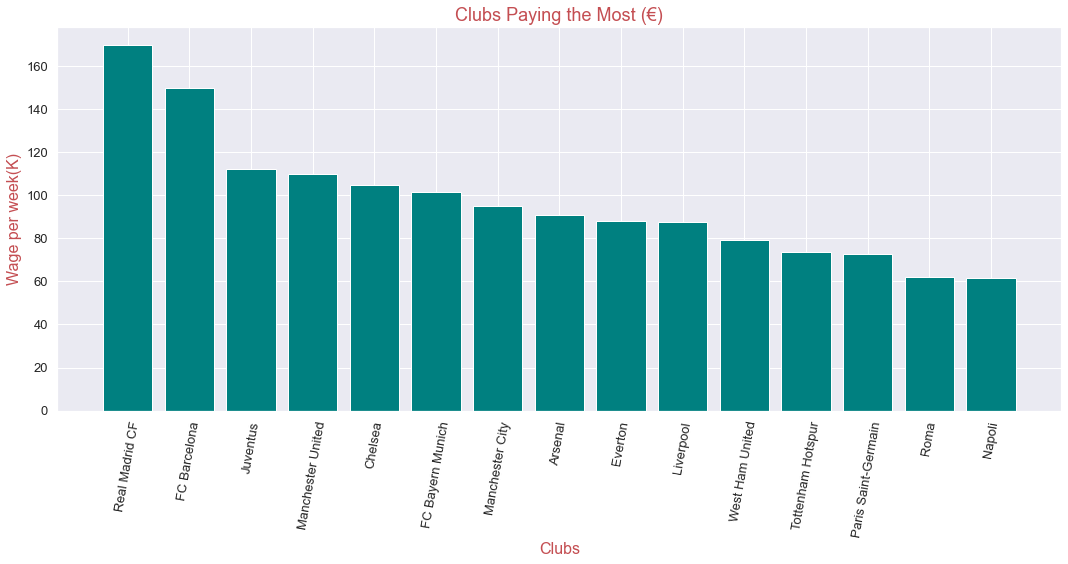

In [36]:
plt.figure(figsize=(15, 8))
plt.bar('Club', 'Wage (K)', data=a, color='teal')
plt.xticks(rotation=80, fontsize=13)
plt.yticks(fontsize=13)

plt.xlabel('Clubs', fontsize=16, color='r')
plt.ylabel('Wage per week(K)', fontsize=16, color='r')
plt.title('Clubs Paying the Most (€)', fontsize=18, color='r')

plt.tight_layout()
plt.show()

<br>

### Qs4  Most Valuable Players

In [37]:
# Most valuable players
a = df_4.sort_values(by='Value (M)', ascending=False)[['Name', 'Club', 'Wage (K)', 'Value (M)', 'Position']][:15]
a.head()

,Name,Club,Wage (K),Value (M),Position
2,Neymar,Paris Saint-Germain,280.0,123.0,Attacker
1,L. Messi,FC Barcelona,565.0,105.0,Attacker
3,L. Suárez,FC Barcelona,510.0,97.0,Attacker
0,Cristiano Ronaldo,Real Madrid CF,565.0,95.5,Attacker
5,R. Lewandowski,FC Bayern Munich,355.0,92.0,Attacker


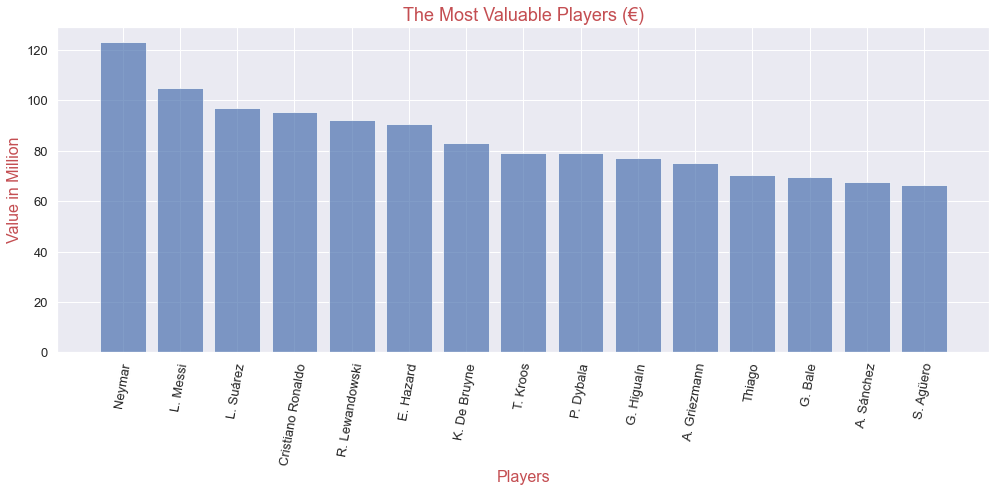

In [38]:
plt.figure(figsize=(14,7))

plt.bar('Name', 'Value (M)', data=a, alpha=.7)
plt.xticks(a['Name'], fontsize=13, rotation=80)
plt.yticks(fontsize=13)

plt.xlabel('Players', fontsize=16, color='r')
plt.ylabel('Value in Million', fontsize=16, color='r')
plt.title('The Most Valuable Players (€)', fontsize=18, color='r')

plt.tight_layout()
plt.show()

<br>

### Qs5  Nationality with most valuable players:

In [39]:
a = df_4.groupby('Nationality')[['Value (M)']].agg(['sum']).apply(lambda x: x.sort_values(ascending=False))\
            .reset_index()[:15]
a.columns = ['Nationality', 'Value (M)'] 
a.head()

,Nationality,Value (M)
0,Spain,4603.275
1,France,3267.065
2,Brazil,3255.225
3,Germany,2989.265
4,Argentina,2806.895


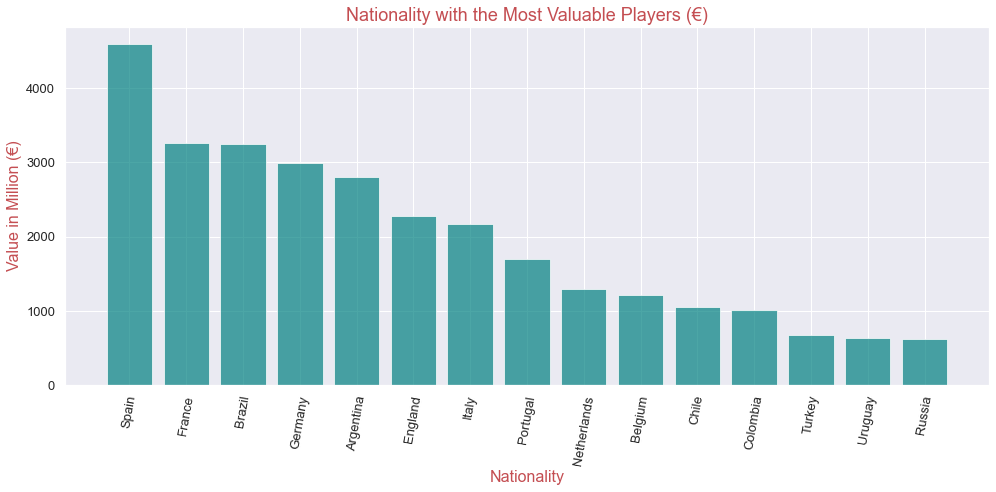

In [40]:
plt.figure(figsize=(14,7))

plt.bar('Nationality', 'Value (M)', data=a, color='teal', alpha=.7)
plt.xticks(a['Nationality'], fontsize=13, rotation=80)
plt.yticks(fontsize=13)

plt.xlabel('Nationality', fontsize=16, color='r')
plt.ylabel('Value in Million (€)', fontsize=16, color='r')
plt.title('Nationality with the Most Valuable Players (€)', fontsize=18, color='r')

plt.tight_layout()
plt.show()

<br>

### Qs6  Most represented nationality:

In [41]:
a = df_4.groupby('Nationality')[['Name']].agg(['count'])\
        .apply(lambda x: x.sort_values(ascending=False)).reset_index()[:15]

a.columns = ['Nationality', 'Frequency']

a.head()

,Nationality,Frequency
0,England,1630
1,Germany,1140
2,Spain,1019
3,France,978
4,Argentina,965


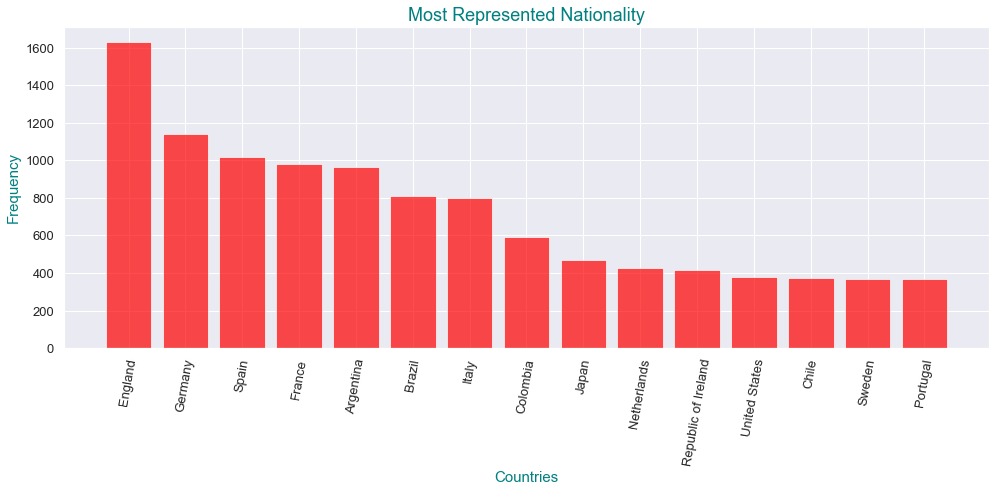

In [42]:
plt.figure(figsize=(14,7))

plt.bar('Nationality', 'Frequency', data=a, color='red', alpha=.7)
plt.xticks(a['Nationality'], fontsize=13, rotation=80)
plt.yticks(fontsize=13)

plt.xlabel('Countries', fontsize=15, color='teal')
plt.ylabel('Frequency', fontsize=15, color='teal')
plt.title('Most Represented Nationality', fontsize=18, color='teal')

plt.tight_layout()
plt.show()

<br>

### Qs7  Players with The Most Potential:

In [43]:
# Reset indices and drop the former indices
a = df_4.sort_values(by='Potential', ascending=False).reset_index(drop=True)
a = a[['Name', 'Overall', 'Potential', 'Position']][:15]
a.head()

,Name,Overall,Potential,Position
0,Cristiano Ronaldo,94,94,Attacker
1,Neymar,92,94,Attacker
2,G. Donnarumma,82,94,Goalkeeper
3,K. Mbappé,83,94,Attacker
4,L. Messi,93,93,Attacker


<ipython-input-44-1c5f328fc8ff>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels=a['Name'], rotation=80, fontsize=13)


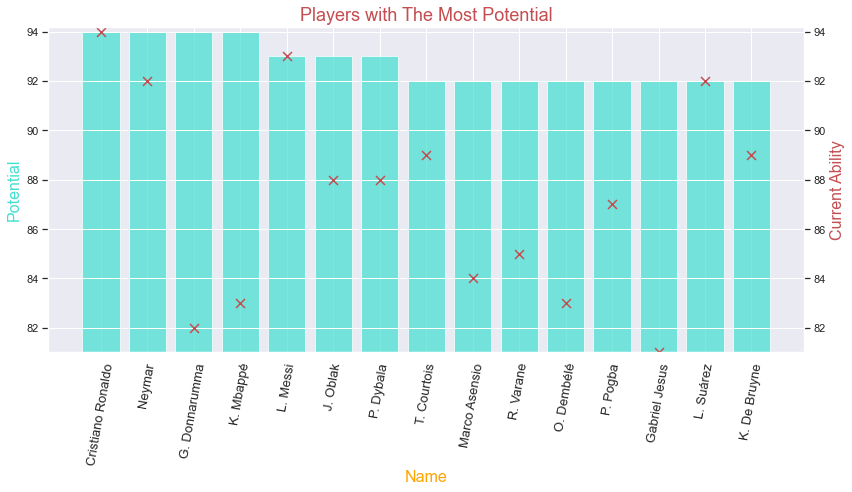

In [44]:
# plt.figure(figsize=(12, 7))
fig, ax1 = plt.subplots(figsize=(12, 7))
ax2 = ax1.twinx()

ax1.bar('Name', 'Potential', data=a, color='turquoise', alpha=.7)
ax1.set_xticklabels(labels=a['Name'], rotation=80, fontsize=13)
ax1.set_ylim([81, 94.2])

ax2.scatter(range(15), a['Overall'], s=80, marker='x', color='r')
ax2.set_ylim([81, 94.2])

ax1.set_xlabel('Name', fontsize=16, color='orange')
ax1.set_ylabel('Potential', fontsize=16, color='turquoise')
ax2.set_ylabel('Current Ability', fontsize=16, color='r')
plt.title('Players with The Most Potential', fontsize=18, color='r')

plt.tight_layout()
plt.show()

<br>

### Qs8   The Most Versatile Players:

In [45]:
# make a copy
df_5 = df_4.copy()

# Add a 'n_positions' column
df_5['n_positions'] = df_5.loc[:, 'Preferred Positions'].apply(lambda x: len(x.split(',')))

In [46]:
a = df_5.sort_values(by='n_positions', ascending=False)[:15]
a = a.loc[:, ['Name', 'Overall', 'Club', 'Preferred Positions', 'Position', 'n_positions']]
a.head()

,Name,Overall,Club,Preferred Positions,Position,n_positions
770,V. Eysseric,78,Fiorentina,"LM,CAM,LW,RW",Midfielder,4
11058,M. Harriman,64,Wycombe Wanderers,"LM,LB,RM,RB",Midfielder,4
12887,P. Diouf,62,Odds BK,"LM,ST,RW,LW",Midfielder,4
2081,R. Laborde,74,FC Krasnodar,"RM,CAM,LW,RW",Midfielder,4
4774,S. Lletget,71,LA Galaxy,"CDM,CM,LM,RM",Midfielder,4


<br>

### Qs9   Best Penalty and Freekick Takers:

In [47]:
# Drop rows with missing values
df_5 = df_5.dropna(how='any')

**Best penalty AND freekick takers:**

In [48]:
# Determine the threshold (99th percentile) for 'Penalties' and 'Free kick accuracy'
p = np.percentile((df_5['Penalties']), 99)
f = np.percentile((df_5['Free kick accuracy']), 99)

a = df_5.loc[(df_5['Penalties'] >= p) & (df_5['Free kick accuracy'] >= f), 
         ['Name', 'Overall', 'Club', 'Penalties', 'Free kick accuracy', 'Position']][:15]

a.sort_values(by=['Penalties', 'Free kick accuracy'], ascending=False).head()

,Name,Overall,Club,Penalties,Free kick accuracy,Position
31,Z. Ibrahimović,88,Manchester United,91.0,82.0,Attacker
286,L. Baines,82,Everton,90.0,82.0,Defender
196,Y. Touré,83,Manchester City,89.0,86.0,Midfielder
55,M. Reus,86,Borussia Dortmund,87.0,84.0,Attacker
19,P. Dybala,88,Juventus,86.0,84.0,Attacker


**Qs10 Best freekick OR penalty takers:**

In [49]:
# Determine the threshold (99th percentile) for 'Penalties' and 'Free kick accuracy'
p = np.percentile((df_5['Penalties']), 99)
f = np.percentile((df_5['Free kick accuracy']), 99)

a = df_5.loc[(df_5['Penalties'] >= p) | (df_5['Free kick accuracy'] >= f), 
         ['Name', 'Overall', 'Club', 'Free kick accuracy', 'Penalties', 'Position']][:15]

a.sort_values(by=['Free kick accuracy', 'Penalties'], ascending=False).head()

,Name,Overall,Club,Free kick accuracy,Penalties,Position
1,L. Messi,93,FC Barcelona,90.0,74.0,Attacker
15,G. Bale,89,Real Madrid CF,85.0,76.0,Attacker
19,P. Dybala,88,Juventus,84.0,86.0,Attacker
3,L. Suárez,92,FC Barcelona,84.0,85.0,Attacker
2,Neymar,92,Paris Saint-Germain,84.0,81.0,Attacker


<br>

### Qs11  Most Aggressive Players:

In [50]:
a = df_5.loc[(df_5['Overall'] >= 78) & (df_5['Overall'] < 86)]
a = a[['Name', 'Overall', 'Club', 'Position', 'Aggression']]

a.groupby('Position')[['Aggression']].agg(['median'])

,Aggression
,median
Position,
Attacker,65.0
Defender,79.0
Midfielder,71.5


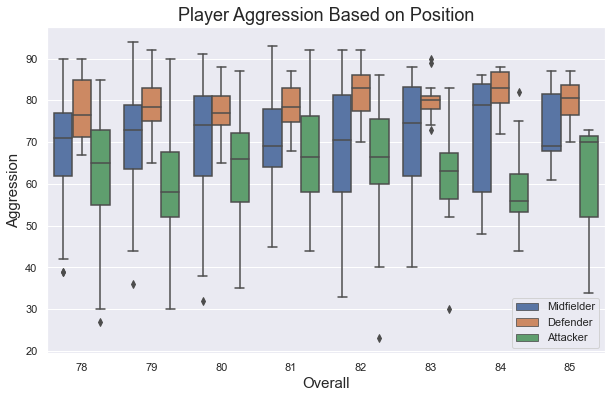

In [51]:
plt.figure(figsize=(10,6))

sns.boxplot(x='Overall', y='Aggression', hue='Position', data=a)
plt.xlabel('Overall', fontsize=15)
plt.ylabel('Aggression', fontsize=15)
plt.title('Player Aggression Based on Position', fontsize=18)

plt.legend(loc=0)
plt.show()

<br>

### Qs12 Players with the Most Stamina:

In [52]:
a = df_5.loc[(df_5['Overall'] >= 78) & (df_5['Overall'] < 86)]
a = a[['Name', 'Overall', 'Club', 'Position', 'Stamina', 'Strength']]

a.groupby('Position')[['Stamina']].agg(['median'])

,Stamina
,median
Position,
Attacker,74.0
Defender,75.0
Midfielder,78.0


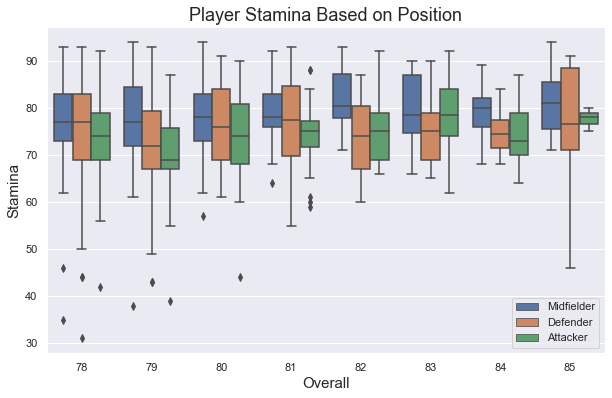

In [53]:
plt.figure(figsize=(10,6))

sns.boxplot(x='Overall', y='Stamina', hue='Position', data=a)
plt.xlabel('Overall', fontsize=15)
plt.ylabel('Stamina', fontsize=15)
plt.title('Player Stamina Based on Position', fontsize=18)

plt.legend(loc=0)
plt.show()

<br>

**Players with more ball control:**

In [54]:
a = df_5.loc[(df_5['Overall'] >= 78) & (df_5['Overall'] < 86)]
a = a[['Name', 'Overall', 'Club', 'Position', 'Ball control', 'Dribbling']]

a.groupby('Position')[['Ball control', 'Dribbling']].agg(['median'])

,Ball control,Dribbling
,median,median
Position,,
Attacker,81.0,81.0
Defender,71.0,63.0
Midfielder,80.0,78.0


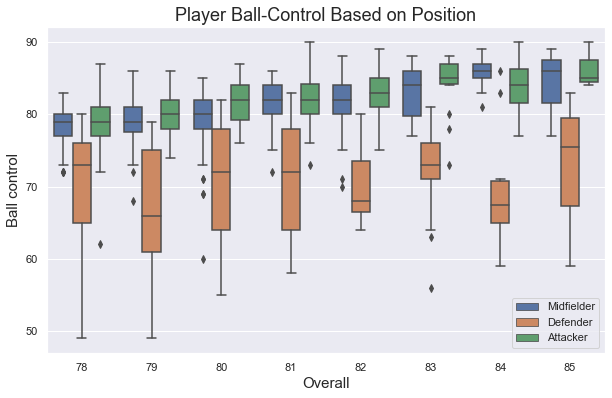

In [55]:
plt.figure(figsize=(10,6))

sns.boxplot(x='Overall', y='Ball control', hue='Position', data=a)
plt.xlabel('Overall', fontsize=15)
plt.ylabel('Ball control', fontsize=15)
plt.title('Player Ball-Control Based on Position', fontsize=18)

plt.legend(loc=0)
plt.show()

<br>

### Qs13  Players with the Best Positioning:

In [56]:
a = df_5.loc[(df_5['Overall'] >= 78) & (df_5['Overall'] < 86)]
a = a[['Name', 'Overall', 'Club', 'Position', 'Positioning', 'Agility']]

a.groupby('Position')[['Positioning', 'Agility']].agg(['median'])

,Positioning,Agility
,median,median
Position,,
Attacker,79.0,78.0
Defender,49.0,64.0
Midfielder,74.0,76.0


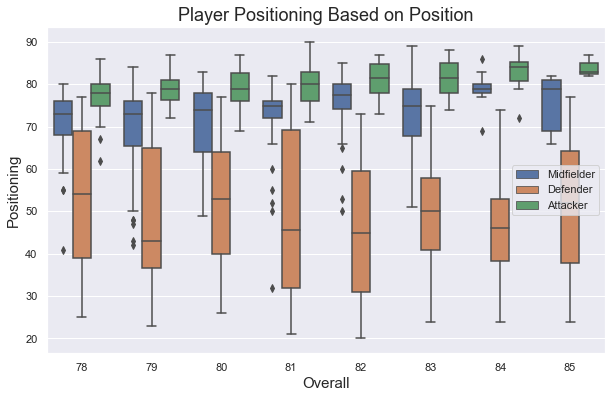

In [57]:
plt.figure(figsize=(10,6))

sns.boxplot(x='Overall', y='Positioning', hue='Position', data=a)
plt.xlabel('Overall', fontsize=15)
plt.ylabel('Positioning', fontsize=15)
plt.title('Player Positioning Based on Position', fontsize=18)

plt.legend(loc=0)
plt.show()

**Players with the best Jumping attribute:**

In [58]:
a = df_5.loc[(df_5['Overall'] >= 78) & (df_5['Overall'] < 86)]
a = a[['Name', 'Overall', 'Club', 'Position', 'Jumping', 'Heading accuracy']]

a.groupby('Position')[['Jumping', 'Heading accuracy']].agg(['median'])

,Jumping,Heading accuracy
,median,median
Position,,
Attacker,71.0,67.0
Defender,76.0,77.0
Midfielder,69.0,61.0


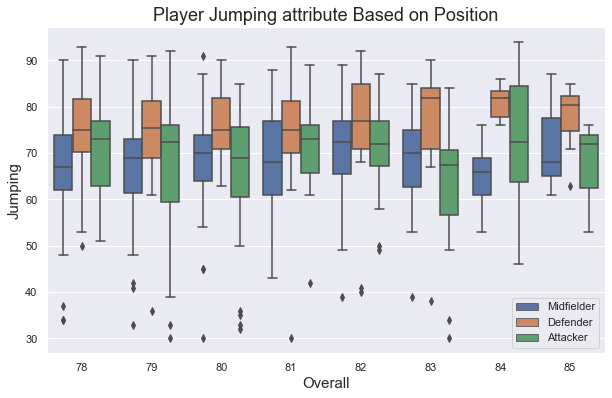

In [59]:
plt.figure(figsize=(10,6))

sns.boxplot(x='Overall', y='Jumping', hue='Position', data=a)
plt.xlabel('Overall', fontsize=15)
plt.ylabel('Jumping', fontsize=15)
plt.title('Player Jumping attribute Based on Position', fontsize=18)

plt.legend(loc=0)
plt.show()

**Players' Wage (K) based on their Position:**

In [60]:
a = df_5.loc[(df_5['Overall'] >= 80) & (df_5['Overall'] < 89)]
a = a[['Name', 'Overall', 'Club', 'Position', 'Wage (K)']]

a.groupby('Position')[['Wage (K)']].agg(['median'])

,Wage (K)
,median
Position,
Attacker,75.0
Defender,79.0
Midfielder,73.5


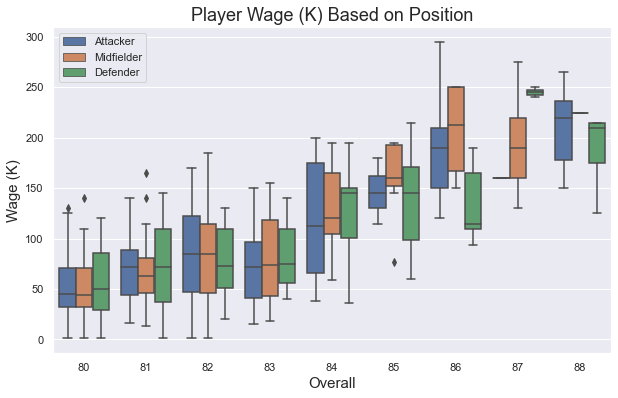

In [61]:
# Based on players with 'Overall' between 81 and 88
plt.figure(figsize=(10,6))

sns.boxplot(x='Overall', y='Wage (K)', hue='Position', data=a)
plt.xlabel('Overall', fontsize=15)
plt.ylabel('Wage (K)', fontsize=15)
plt.title('Player Wage (K) Based on Position', fontsize=18)

plt.legend(loc=0)
plt.show()